In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [31]:
#Loading the data
df = pd.read_csv('CleanPA.csv')
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,LivingStatus,Age,TotalSpent,Children,Parents,FamilySize
0,Graduated,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,Single,64,1617,0,0,1
1,Graduated,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,Single,67,27,2,1,3
2,Graduated,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,Partner,56,776,0,0,2
3,Graduated,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,Partner,37,53,1,1,3
4,Postgrad,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,Partner,40,422,1,1,3


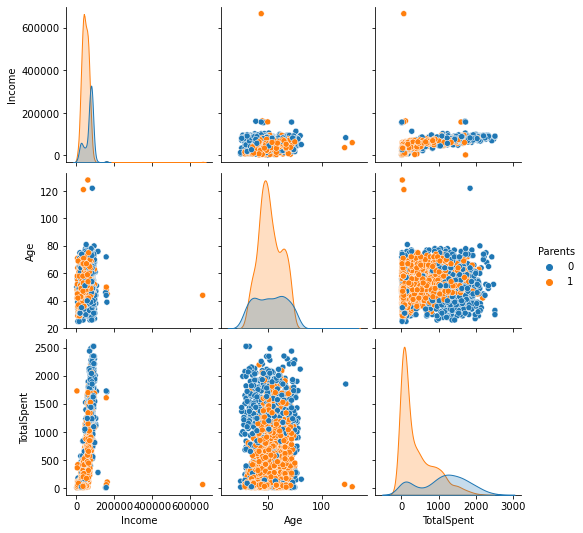

In [32]:
lst= ['Income','Age', 'Parents', 'TotalSpent','Education']
sns.pairplot(df[lst], hue = 'Parents')
plt.show()

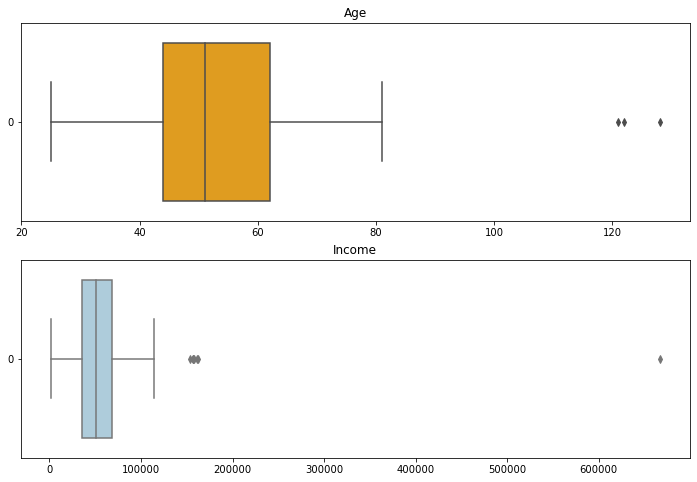

In [33]:
fig, axes = plt.subplots(2,1,figsize=(12,8))

sns.boxplot(ax = axes[0],data = df['Age'], orient = 'h', palette= ['orange', 'muted'])
axes[0].title.set_text('Age')
sns.boxplot(ax = axes[1],data = df['Income'], orient = 'h', palette= 'Paired')
axes[1].title.set_text('Income')

In [34]:
#Since we can see out outliers we know we can remove them out.
df = df[(df['Age'] < 85)]
df = df[(df["Income"]<130000)]

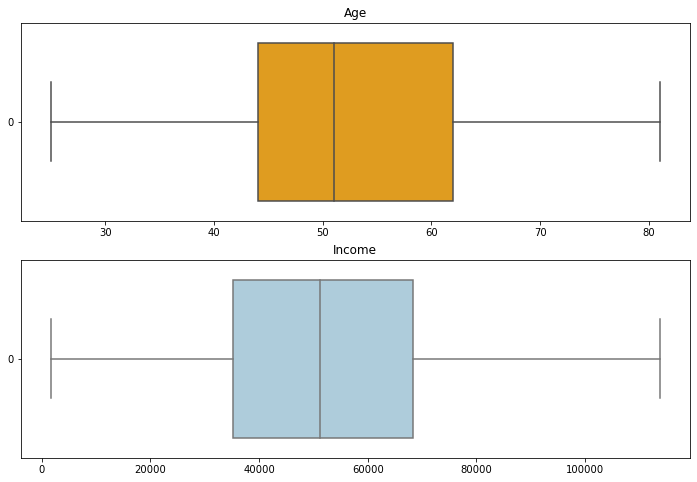

In [35]:
fig, axes = plt.subplots(2,1,figsize=(12,8))
sns.boxplot(ax = axes[0],data = df['Age'], orient = 'h', palette= ['orange', 'muted'])
axes[0].title.set_text('Age')
sns.boxplot(ax = axes[1],data = df['Income'], orient = 'h', palette= 'Paired')
axes[1].title.set_text('Income')

<AxesSubplot:>

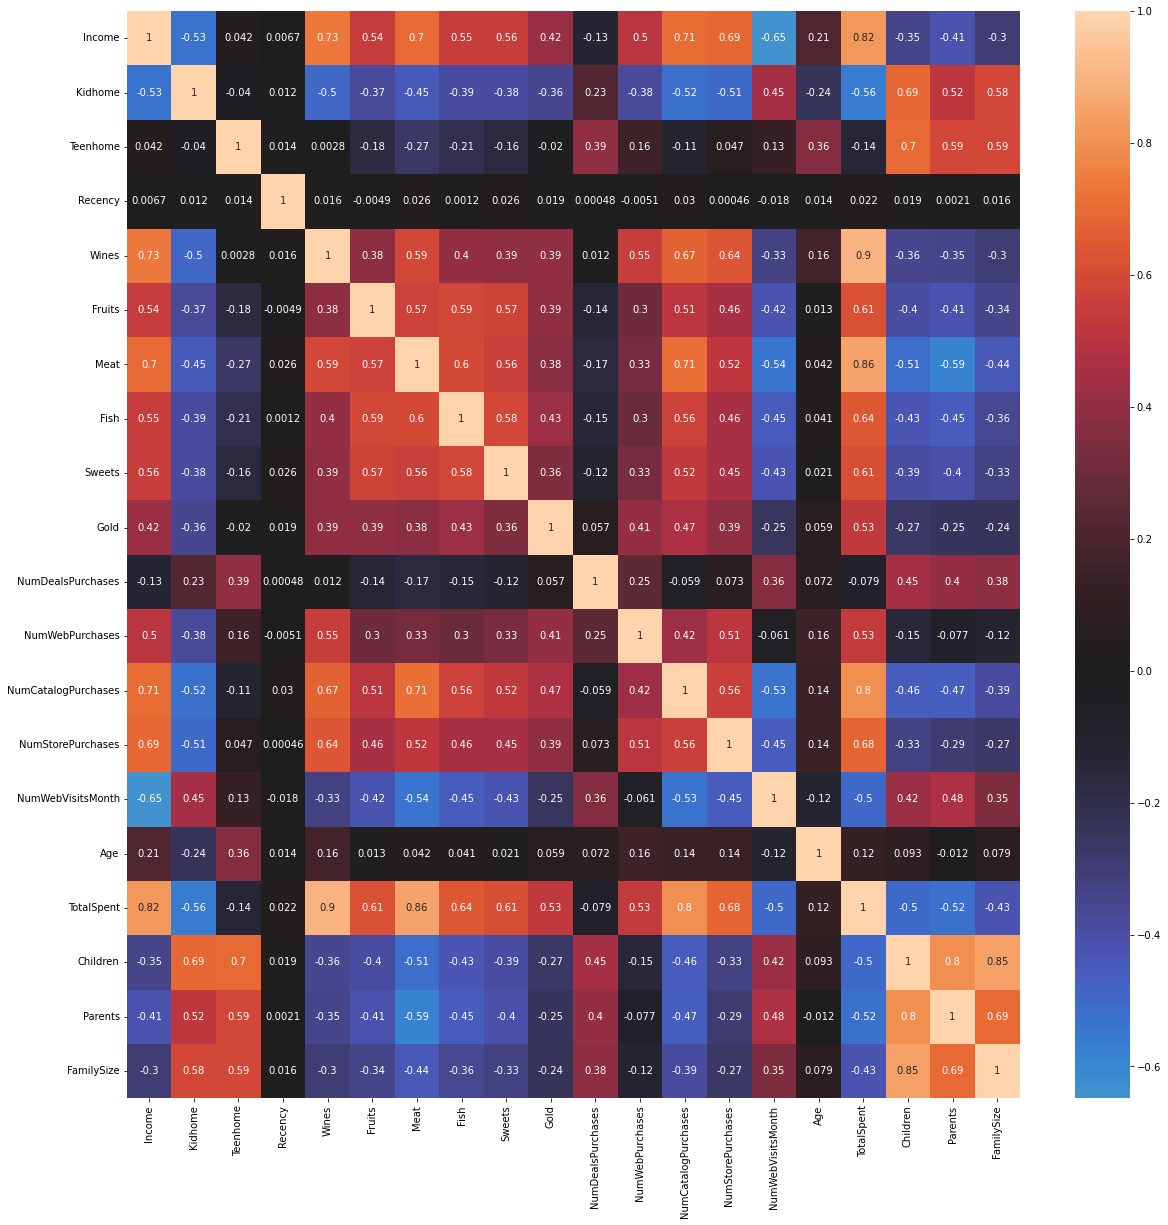

In [36]:
#Lets look at the correlation between the data
cor = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot= True, center= 0)

In [37]:
#Processing the data
obj = (df.dtypes == 'object')
lst = list(obj[obj].index)
print('Categorical in the data:', lst)

Categorical in the data: ['Education', 'LivingStatus']


In [38]:
#Transform the object dtypes.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in lst:
    df[i]=df[[i]].apply(LE.fit_transform)

In [39]:
#Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
dfScaled = pd.DataFrame(scaler.transform(df),columns= df.columns )
dfScaled

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,LivingStatus,Age,TotalSpent,Children,Parents,FamilySize
0,-0.892338,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,...,1.424772,2.628526,-0.562650,0.689203,1.347625,1.017189,1.679323,-1.266589,-1.58466,-1.759012
1,-0.892338,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,...,-1.132957,-0.588043,-1.179732,-0.139645,1.347625,1.273530,-0.963897,1.403420,0.63105,0.448513
2,-0.892338,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,...,1.424772,-0.230646,1.288596,-0.554069,-0.742046,0.333612,0.281242,-1.266589,-1.58466,-0.655250
3,-0.892338,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,...,-0.767567,-0.945440,-0.562650,0.274779,-0.742046,-1.289883,-0.920675,0.068415,0.63105,0.448513
4,0.571654,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,...,0.328602,0.126750,0.054432,-0.139645,-0.742046,-1.033542,-0.307248,0.068415,0.63105,0.448513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,-0.892338,0.463624,-0.823405,0.906602,-0.104028,1.193879,0.417263,0.076644,0.077420,2.209853,...,1.790162,0.126750,-0.562650,-0.139645,-0.742046,0.162718,1.220500,0.068415,0.63105,0.448513
2201,0.571654,0.598401,2.900920,0.906602,0.241687,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,...,1.424772,-0.230646,-0.254109,0.689203,-0.742046,1.957107,-0.270675,2.738424,0.63105,2.656038
2202,-0.892338,0.258780,-0.823405,-0.930767,1.451690,1.783653,0.542969,0.237389,-0.105022,-0.367897,...,-0.767567,0.126750,2.214218,0.274779,1.347625,-1.033542,1.054260,-1.266589,-1.58466,-1.759012
2203,0.571654,0.851004,-0.823405,0.906602,-1.417746,0.361082,0.090428,0.223611,0.770696,0.069834,...,0.693992,0.841543,1.288596,-0.968493,-0.742046,1.102636,0.392623,0.068415,0.63105,0.448513


In [40]:
#PCA - Principal Component Analysis - Helps us increase interpretability while minimizing information loss.
from sklearn.decomposition import PCA
pca = PCA(n_components = .95) #We can set our eigen at 95 or 99% depends on our situation
pca.fit(dfScaled)
pcaDF = pd.DataFrame(pca.transform(dfScaled))
pcaDF.columns = ["Col"+str(i) for i in range(1, 16)]
pcaDF.describe().T
#Here we can see at 95% we have 15 eigen values.


,count,mean,std,min,25%,50%,75%,max
Col1,2205.0,-1.417863e-16,2.901676,-6.020464,-2.575461,-0.785748,2.421799,7.477675
Col2,2205.0,-3.222416e-17,1.705683,-4.304349,-1.338764,-0.155976,1.248140,6.133599
Col3,2205.0,-1.611208e-18,1.152565,-3.016449,-0.903314,-0.117354,0.805289,3.960279
Col4,2205.0,6.283711e-17,1.118684,-3.142721,-0.783229,0.038149,0.730076,5.458270
Col5,2205.0,-1.933450e-17,1.040637,-2.683932,-0.735621,-0.001364,0.708396,3.230464
Col6,2205.0,3.866899e-17,0.995641,-2.576491,-0.812648,0.005812,0.786748,2.599963
Col7,2205.0,8.136600e-17,0.964937,-3.403829,-0.691767,-0.026864,0.593716,3.476050
Col8,2205.0,-6.444832e-18,0.892114,-3.465207,-0.512110,-0.050434,0.457856,3.740571
Col9,2205.0,-2.900174e-17,0.818398,-3.405800,-0.525762,-0.008660,0.495287,5.494355
Col10,2205.0,6.444832e-18,0.787967,-3.886786,-0.315630,0.034078,0.394356,4.470232


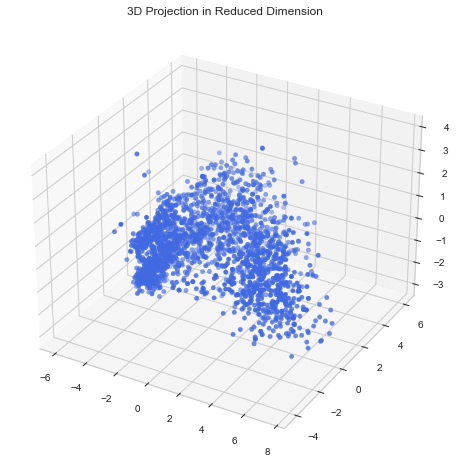

In [47]:
#A 3D Projection Of Data In The Reduced Dimension
x = pcaDF["Col1"]
y = pcaDF["Col2"]
z = pcaDF["Col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="royalblue", marker="o" )
ax.set_title('3D Projection in Reduced Dimension')
plt.show()

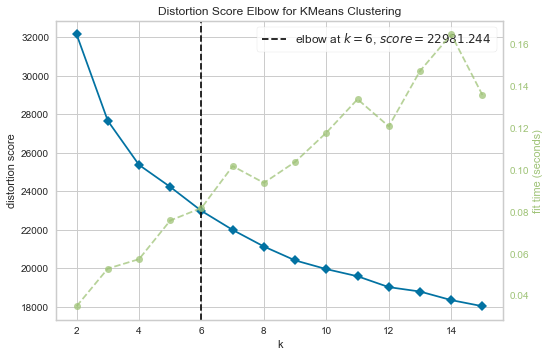

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
#KMeans -Yellowbrick Elbow Method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow = KElbowVisualizer(KMeans(), k=15)
elbow.fit(pcaDF)
elbow.show()
#We can see from yellowbrick that our elbow is at 6.

In [43]:
#KMeans Using MinMaxScaler and Matplot
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)
transformDF =mms.transform(df)
s2d = [] #Sum of Squared Distance
K = range(1,15)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(transformDF)
    s2d.append(km.inertia_)

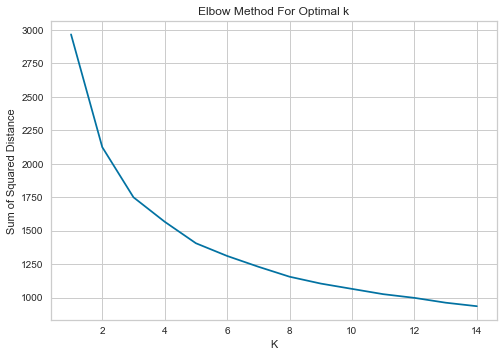

In [44]:
#Searching for the Elbow
plt.plot(K, s2d, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method For Optimal k')
plt.show()
#From here we can see the elbow is around k = 5 or 6

In [45]:
#Agglomerative Clusting Model
from sklearn.cluster import AgglomerativeClustering
AggC = AgglomerativeClustering(n_clusters = 6)
yhat = AggC.fit_predict(pcaDF)
df['Clusters'] = yhat

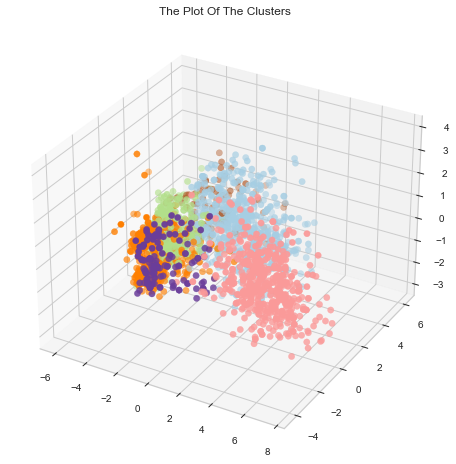

In [48]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=df["Clusters"], marker='o', cmap = 'Paired' )
ax.set_title("The Plot Of The Clusters")
plt.show()

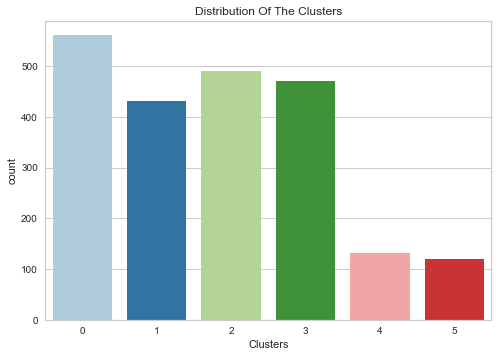

In [49]:
pl = sns.countplot(x = df["Clusters"], palette= 'Paired')
pl.set_title("Distribution Of The Clusters")
plt.show()

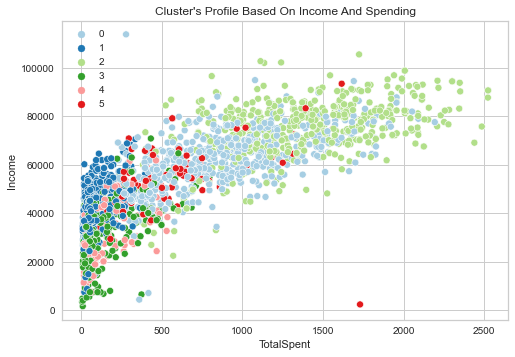

In [50]:
pl = sns.scatterplot(data = df, x = df['TotalSpent'], y = df['Income'], hue= df['Clusters'], palette= 'Paired')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seabor

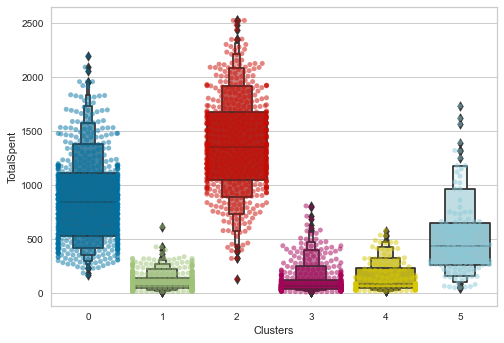

In [53]:
plt.figure()
pl=sns.swarmplot(x = df["Clusters"], y = df["TotalSpent"],  alpha=0.5 )
pl=sns.boxenplot(x = df["Clusters"], y = df["TotalSpent"])
plt.show()

<Figure size 576x396 with 0 Axes>

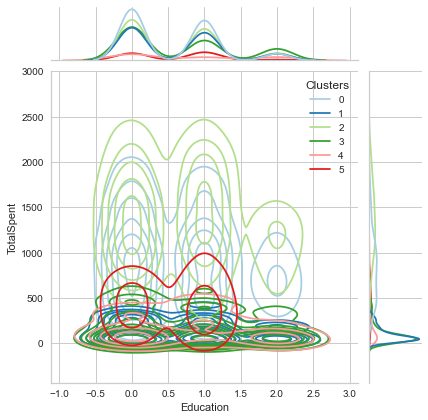

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

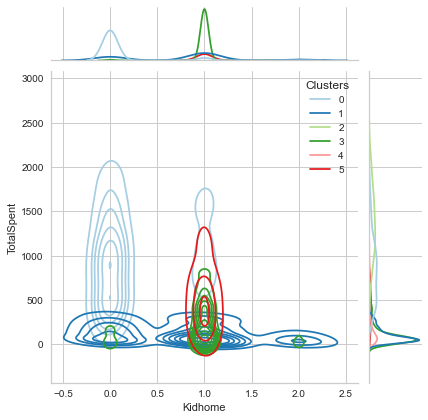

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

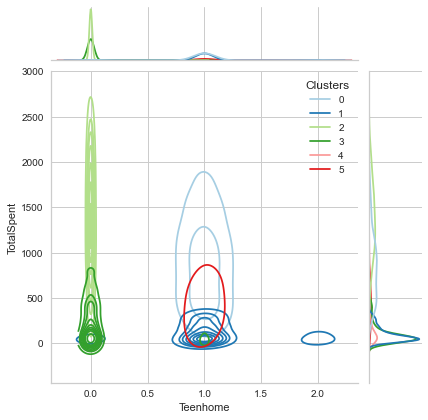

<Figure size 576x396 with 0 Axes>

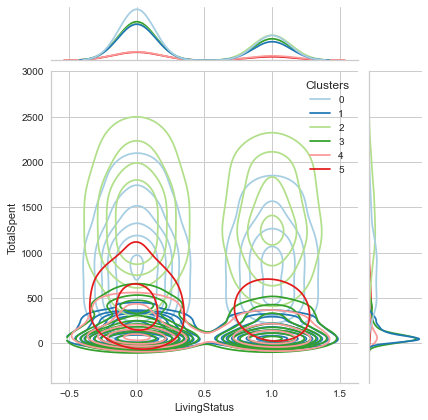

<Figure size 576x396 with 0 Axes>

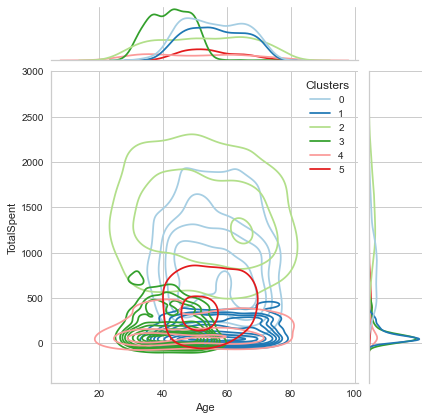

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

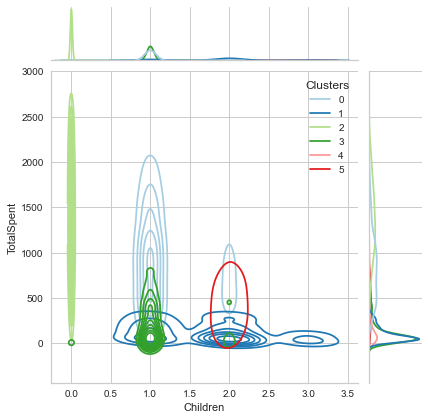

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

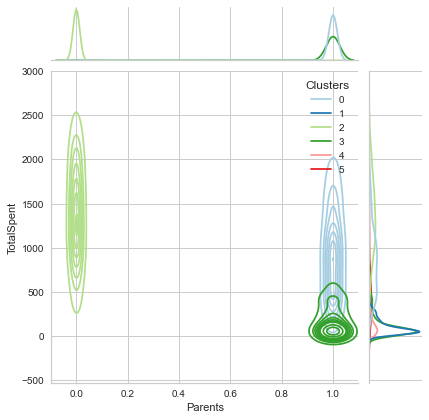

<Figure size 576x396 with 0 Axes>

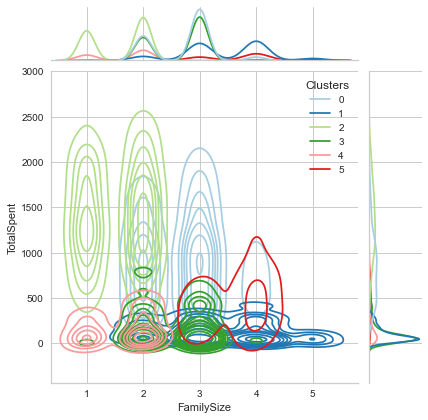

In [54]:
Personal = ['Education', 'Kidhome', 'Teenhome', 'LivingStatus', 'Age', 'Children','Parents', 'FamilySize']

for i in Personal:
    plt.figure()
    sns.jointplot(x = df[i], y = df["TotalSpent"], hue = df["Clusters"], kind="kde", palette= 'Paired')
    plt.show()